In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from itertools import combinations
from scipy import stats

# Results
## Regression Metrics

In [15]:
base_dirs = {
    "Informer": "/Users/williamnordansjo/DABEN/DABN01 - Masters' Thesis/Result Data/informer_results",
    "PatchTST": "/Users/williamnordansjo/DABEN/DABN01 - Masters' Thesis/Result Data/patchtst_results"
}

def extract_info(foldername):
    match = re.search(r"forecast_([a-z]+)_([a-z]+)_", foldername)
    if match:
        return match.group(1), match.group(2)
    return None, None

results = []

for model_type, base_path in base_dirs.items():
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        metrics_path = os.path.join(folder_path, "metrics.npy")
        
        if os.path.isfile(metrics_path):
            try:
                metrics = np.load(metrics_path)
                company, label = extract_info(folder)
                
                results.append({
                    "Prediction Model": model_type,
                    "Stock": company,
                    "Sentiment Model": label,
                    "MAE": metrics[0],
                    "MSE": metrics[1],
                    #"RMSE": metrics[2],
                    #"MAPE": metrics[3],
                    #"MSPE": metrics[4]
                    "MedAE": metrics[6],
                    "MedSE": metrics[5]
                })
            except Exception as e:
                print(f"Fel vid inläsning av {folder}: {e}")

df = pd.DataFrame(results)
df

,Prediction Model,Stock,Sentiment Model,MAE,MSE,MedAE,MedSE
0,Informer,amzn,finbert,1.944212,18.965073,0.684740,0.468869
1,Informer,googl,vader,1.760337,13.634315,0.791642,0.626698
2,Informer,aapl,finbert,2.017206,16.628830,0.708537,0.502025
3,Informer,amzn,roberta,1.952834,18.898062,0.819330,0.671302
4,Informer,googl,finbert,1.688638,13.964996,0.772746,0.597136
5,Informer,msft,roberta,1.946862,14.661685,0.743528,0.552833
6,Informer,googl,roberta,1.716833,13.973214,0.801370,0.642194
7,Informer,msft,finbert,1.954303,14.483999,0.758906,0.575938
8,Informer,nvda,roberta,3.666093,85.119270,0.993082,0.986212
9,Informer,tsla,finbert,4.135189,110.240982,0.648422,0.420452


In [14]:
avg_metrics = (
    df.groupby(['Prediction Model', 'Sentiment Model'])[['MAE', 'MSE','MedAE','MedSE']]
    .mean()
    .reset_index()
    .sort_values(by=['Prediction Model', 'Sentiment Model'])
)

avg_metrics

,Prediction Model,Sentiment Model,MAE,MSE,MedAE,MedSE
0,Informer,finbert,2.353916,37.882412,0.725642,0.542052
1,Informer,roberta,2.349533,37.815716,0.766862,0.604972
2,Informer,vader,2.391582,37.606647,0.891603,0.825319
3,PatchTST,finbert,2.210515,37.240776,0.504764,0.269312
4,PatchTST,roberta,2.201375,36.940472,0.496175,0.258705
5,PatchTST,vader,2.138742,37.525970,0.407787,0.192597


## Pseudo Classification with Directional Accuracy

In [4]:
import numpy as np

def evaluate_directional_accuracy(y_true, y_pred):
    """
    Computes directional accuracy and confusion matrix values
    for predicted and true time series (1st differences).

    Returns:
        mda: Mean directional accuracy
        cm: Dict of TP, FP, TN, FN
    """
    # Ensure input is flat and arrays
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Remove first value (no previous value to diff against)
    true_diff = np.diff(y_true)
    pred_diff = np.diff(y_pred)

    # Truncate to same length (in case of mismatch)
    T = min(len(true_diff), len(pred_diff))
    true_diff = true_diff[:T]
    pred_diff = pred_diff[:T]

    # Convert to directional class (1 = increase or same, 0 = decrease)
    true_class = (true_diff >= 0).astype(int)
    pred_class = (pred_diff >= 0).astype(int)

    # MDA
    correct_direction = (true_class == pred_class)
    mda = np.mean(correct_direction)

    # Confusion matrix
    TP = np.sum((true_class == 1) & (pred_class == 1))
    TN = np.sum((true_class == 0) & (pred_class == 0))
    FP = np.sum((true_class == 0) & (pred_class == 1))
    FN = np.sum((true_class == 1) & (pred_class == 0))

    cm = {
        "TP": TP,
        "FP": FP,
        "TN": TN,
        "FN": FN
    }

    return mda, cm


In [5]:
import numpy as np
import pandas as pd

# Modellmapp
model_path = "/Users/williamnordansjo/DABEN/DABN01 - Masters' Thesis/Result Data/informer_results/long_term_forecast_aapl_finbert_informer_best_Informer_custom_ftM_sl60_ll45_pl1_dm512_nh8_el3_dl2_df2048_expand2_dc4_fc1_ebtimeF_dtTrue_aapl_finbert_informer_best_0"

# Ladda arrays
pred = np.load(f"{model_path}/pred.npy").flatten()
true = np.load(f"{model_path}/true.npy").flatten()

In [6]:
mda, cm = evaluate_directional_accuracy(true, pred)

print(f"MDA: {mda:.4f}")
print("Confusion Matrix Counts:", cm)


MDA: 0.4746
Confusion Matrix Counts: {'TP': 247, 'FP': 213, 'TN': 182, 'FN': 262}


In [7]:
import os
import numpy as np
import pandas as pd
import re

# Define function for MDA and confusion matrix
def evaluate_directional_accuracy(y_true, y_pred):
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    true_diff = np.diff(y_true)
    pred_diff = np.diff(y_pred)

    T = min(len(true_diff), len(pred_diff))
    true_diff = true_diff[:T]
    pred_diff = pred_diff[:T]

    true_class = (true_diff >= 0).astype(int)
    pred_class = (pred_diff >= 0).astype(int)

    correct_direction = (true_class == pred_class)
    mda = np.mean(correct_direction)

    TP = np.sum((true_class == 1) & (pred_class == 1))
    TN = np.sum((true_class == 0) & (pred_class == 0))
    FP = np.sum((true_class == 0) & (pred_class == 1))
    FN = np.sum((true_class == 1) & (pred_class == 0))
    Precision = TP/(TP + FP)
    Recall = TP/(TP + FN)
    F1 = 2*((Precision*Recall)/(Precision + Recall))

    cm = {
        "TP": TP,
        "FP": FP,
        "TN": TN,
        "FN": FN
    }

    return mda, cm, Precision, Recall, F1

# Match stock and sentiment from folder names
def extract_info(foldername):
    match = re.search(r"forecast_([a-z]+)_([a-z]+)_", foldername)
    if match:
        return match.group(1), match.group(2)
    return None, None

# Base paths
base_dirs = {
    "Informer": "/Users/williamnordansjo/DABEN/DABN01 - Masters' Thesis/Result Data/informer_results",
    "PatchTST": "/Users/williamnordansjo/DABEN/DABN01 - Masters' Thesis/Result Data/patchtst_results"
}

results = []

# Loop over results folders
for model_type, base_path in base_dirs.items():
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        pred_path = os.path.join(folder_path, "pred.npy")
        true_path = os.path.join(folder_path, "true.npy")

        if os.path.isfile(pred_path) and os.path.isfile(true_path):
            try:
                y_pred = np.load(pred_path).flatten()
                y_true = np.load(true_path).flatten()
                company, label = extract_info(folder)
                
                # Truncate if model is PatchTST
                if model_type == "PatchTST":
                    y_pred = y_pred[-905:]
                    y_true = y_true[-905:]

                mda, cm, Precision, Recall, F1 = evaluate_directional_accuracy(y_true, y_pred)

                results.append({
                    "Prediction Model": model_type,
                    "Stock": company,
                    "Sentiment Model": label,
                    "MDA": mda,
                    "TP": cm["TP"],
                    "FP": cm["FP"],
                    "TN": cm["TN"],
                    "FN": cm["FN"],
                    "Precision": Precision,
                    "Recall": Recall,
                    "F1": F1
                })
            except Exception as e:
                print(f"⚠️ Failed on {folder}: {e}")

# Create dataframe
df_mda = pd.DataFrame(results)
df_mda


,Prediction Model,Stock,Sentiment Model,MDA,TP,FP,TN,FN,Precision,Recall,F1
0,Informer,amzn,finbert,0.495736,232,240,233,233,0.491525,0.498925,0.495197
1,Informer,googl,vader,0.487207,248,216,209,265,0.534483,0.483431,0.507677
2,Informer,aapl,finbert,0.474558,247,213,182,262,0.536957,0.485265,0.509804
3,Informer,amzn,roberta,0.479744,236,238,214,250,0.497890,0.485597,0.491667
4,Informer,googl,finbert,0.503198,246,226,226,240,0.521186,0.506173,0.513570
5,Informer,msft,roberta,0.506397,244,218,231,245,0.528139,0.498978,0.513144
6,Informer,googl,roberta,0.527719,252,227,243,216,0.526096,0.538462,0.532207
7,Informer,msft,finbert,0.507463,249,212,227,250,0.540130,0.498998,0.518750
8,Informer,nvda,roberta,0.456290,242,216,186,294,0.528384,0.451493,0.486922
9,Informer,tsla,finbert,0.523599,177,172,178,151,0.507163,0.539634,0.522895


In [8]:
avg_MDA_metrics = (
    df_mda.groupby(['Prediction Model', 'Sentiment Model'])[['MDA', 'Precision','Recall', 'F1']]
    .mean()
    .reset_index()
    .sort_values(by=['Prediction Model', 'Sentiment Model'])
)

avg_MDA_metrics

,Prediction Model,Sentiment Model,MDA,Precision,Recall,F1
0,Informer,finbert,0.502241,0.518061,0.505609,0.511425
1,Informer,roberta,0.497039,0.526800,0.499470,0.512162
2,Informer,vader,0.490461,0.579154,0.494072,0.532398
3,PatchTST,finbert,0.740676,0.743907,0.698399,0.719682
4,PatchTST,roberta,0.687737,0.737170,0.682675,0.706817
5,PatchTST,vader,0.730405,0.803783,0.744189,0.768715


## Diebold-Mariano Testing

In [5]:
# -- Helper functions --
def extract_info(foldername):
    match = re.search(r"forecast_([a-z]+)_([a-z]+)_", foldername)
    if match:
        return match.group(1).lower(), match.group(2).lower()
    return None, None

def compute_squared_error(true, pred):
    return (true - pred) ** 2

def diebold_mariano_test(loss1_list, loss2_list, h=1):
    S = len(loss1_list)
    assert S == len(loss2_list), "Loss arrays must be same length"
    T = min(len(loss1_list[0]), len(loss2_list[0]))

    d_matrix = np.array([
        loss1_list[s][:T] - loss2_list[s][:T]
        for s in range(S)
    ])
    d_bar_t = np.mean(d_matrix, axis=0)
    d_bar = np.mean(d_bar_t)
    d_demeaned = d_bar_t - d_bar
    T_eff = len(d_bar_t)

    lag = h
    gamma_0 = np.sum(d_demeaned**2) / T_eff
    gamma = [np.sum(d_demeaned[:-l] * d_demeaned[l:]) / T_eff for l in range(1, lag+1)]
    var_hat = gamma_0 + 2 * sum((1 - l / (lag + 1)) * g for l, g in enumerate(gamma, 1))

    DM_stat = d_bar / np.sqrt(var_hat / T_eff)
    p_value = 2 * (1 - stats.norm.cdf(np.abs(DM_stat)))
    return DM_stat, p_value

In [6]:
# -- Paths and combinations --
base_dirs = {
    "Informer": "/Users/williamnordansjo/DABEN/DABN01 - Masters' Thesis/Result Data/informer_results",
    "PatchTST": "/Users/williamnordansjo/DABEN/DABN01 - Masters' Thesis/Result Data/patchtst_results"
}
sentiment_models = ["finbert", "vader", "roberta"]
model_combinations = [(m, s) for m in base_dirs for s in sentiment_models]
panel_losses = {combo: {} for combo in model_combinations}

# -- Load all losses --
for model_type, base_path in base_dirs.items():
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        pred_path = os.path.join(folder_path, "pred.npy")
        true_path = os.path.join(folder_path, "true.npy")

        if not os.path.isfile(pred_path) or not os.path.isfile(true_path):
            continue

        company, sentiment = extract_info(folder)
        if (model_type, sentiment) not in panel_losses:
            continue

        pred = np.load(pred_path).flatten()
        true = np.load(true_path).flatten()

        if model_type == "PatchTST":
            min_len = min(len(pred), len(true), 905)
        else:
            min_len = min(len(pred), len(true))

        pred = pred[:min_len]
        true = true[:min_len]

        losses = compute_squared_error(true, pred)
        panel_losses[(model_type, sentiment)][company] = losses


In [11]:
# -- Run DM test for all 6 pairwise model combinations --
results = []
for model1, model2 in combinations(panel_losses.keys(), 2):
    common_stocks = set(panel_losses[model1].keys()) & set(panel_losses[model2].keys())
    if len(common_stocks) == 0:
        print(f"⚠️ No common stocks for {model1} vs {model2}, skipping.")
        continue

    losses1, losses2 = [], []
    for stock in common_stocks:
        l1 = panel_losses[model1][stock]
        l2 = panel_losses[model2][stock]
        min_len = min(len(l1), len(l2))
        losses1.append(l1[:min_len])
        losses2.append(l2[:min_len])

    fixed_len = 538
    losses1 = [x[:fixed_len] for x in losses1]
    losses2 = [x[:fixed_len] for x in losses2]

    dm_stat, p_value = diebold_mariano_test(losses1, losses2)

    results.append({
        "Model 1": f"{model1[0]}-{model1[1]}",
        "Model 2": f"{model2[0]}-{model2[1]}",
        "DM Statistic": dm_stat,
        "p-value": p_value,
        "N stocks": len(common_stocks),
        "T steps": fixed_len
    })

In [12]:
# -- Output results --
dm_results_df = pd.DataFrame(results)
dm_results_df

,Model 1,Model 2,DM Statistic,p-value,N stocks,T steps
0,Informer-finbert,Informer-vader,0.737111,0.461055,7,538
1,Informer-finbert,Informer-roberta,0.171127,0.864124,7,538
2,Informer-finbert,PatchTST-finbert,-0.601253,0.547671,7,538
3,Informer-finbert,PatchTST-vader,-3.878692,0.000105,7,538
4,Informer-finbert,PatchTST-roberta,-1.772702,0.076278,7,538
5,Informer-vader,Informer-roberta,-0.845174,0.398014,7,538
6,Informer-vader,PatchTST-finbert,-1.136218,0.255865,7,538
7,Informer-vader,PatchTST-vader,-3.710773,0.000207,7,538
8,Informer-vader,PatchTST-roberta,-1.768360,0.077001,7,538
9,Informer-roberta,PatchTST-finbert,-0.756444,0.449383,7,538


In [13]:
rivals = [
    ("Informer-finbert", "PatchTST-finbert"),
    ("Informer-roberta", "PatchTST-roberta"),
    ("Informer-vader", "PatchTST-vader")
]

rival_df = dm_results_df[
    dm_results_df.apply(
        lambda row: (row["Model 1"], row["Model 2"]) in rivals
        or (row["Model 2"], row["Model 1"]) in rivals,
        axis=1
    )
]

rival_df

,Model 1,Model 2,DM Statistic,p-value,N stocks,T steps
2,Informer-finbert,PatchTST-finbert,-0.601253,0.547671,7,538
7,Informer-vader,PatchTST-vader,-3.710773,0.000207,7,538
11,Informer-roberta,PatchTST-roberta,-1.818879,0.068930,7,538


In [16]:
# Define prediction models to extract within-model sentiment comparisons
within_model_df = dm_results_df[
    dm_results_df.apply(
        lambda row: row["Model 1"].split("-")[0] == row["Model 2"].split("-")[0]
                  and row["Model 1"].split("-")[1] != row["Model 2"].split("-")[1],
        axis=1
    )
]


In [19]:
informer_internal = within_model_df[
    within_model_df["Model 1"].str.startswith("Informer")
]
informer_internal

,Model 1,Model 2,DM Statistic,p-value,N stocks,T steps
0,Informer-finbert,Informer-vader,0.737111,0.461055,7,538
1,Informer-finbert,Informer-roberta,0.171127,0.864124,7,538
5,Informer-vader,Informer-roberta,-0.845174,0.398014,7,538


In [20]:
patchtst_internal = within_model_df[
    within_model_df["Model 1"].str.startswith("PatchTST")
]
patchtst_internal

,Model 1,Model 2,DM Statistic,p-value,N stocks,T steps
12,PatchTST-finbert,PatchTST-vader,-2.795845,0.005176,7,538
13,PatchTST-finbert,PatchTST-roberta,-1.229932,0.218723,7,538
14,PatchTST-vader,PatchTST-roberta,2.038845,0.041466,7,538


## Forecasting Visualisations

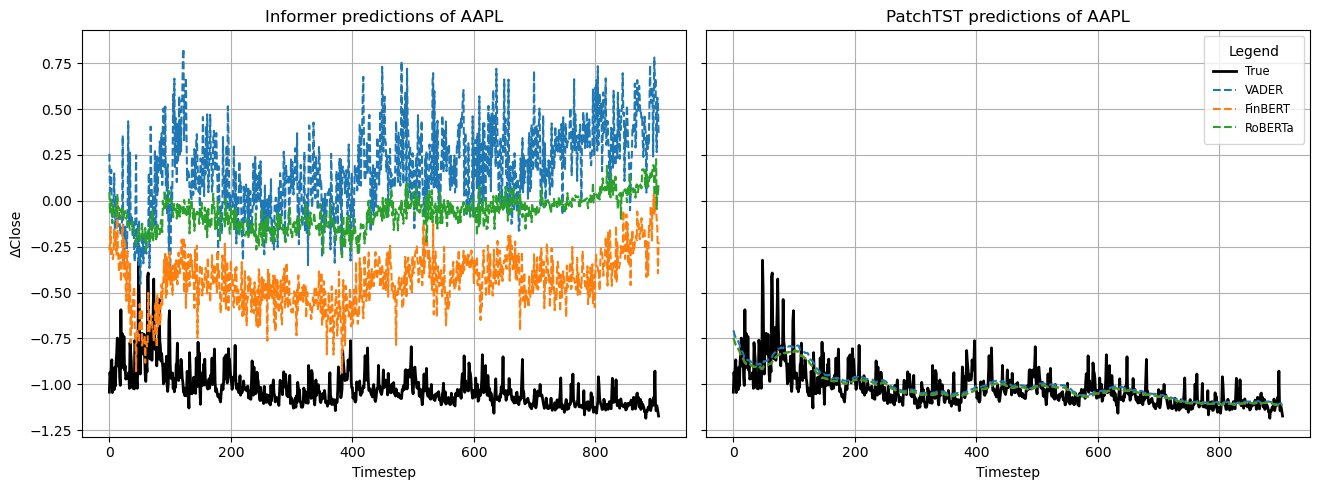

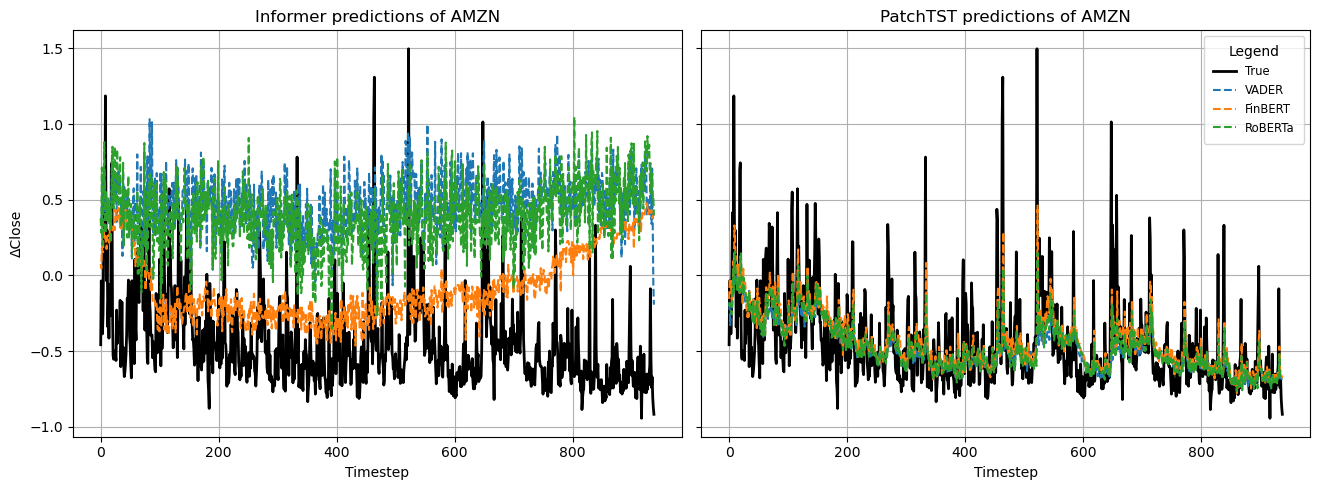

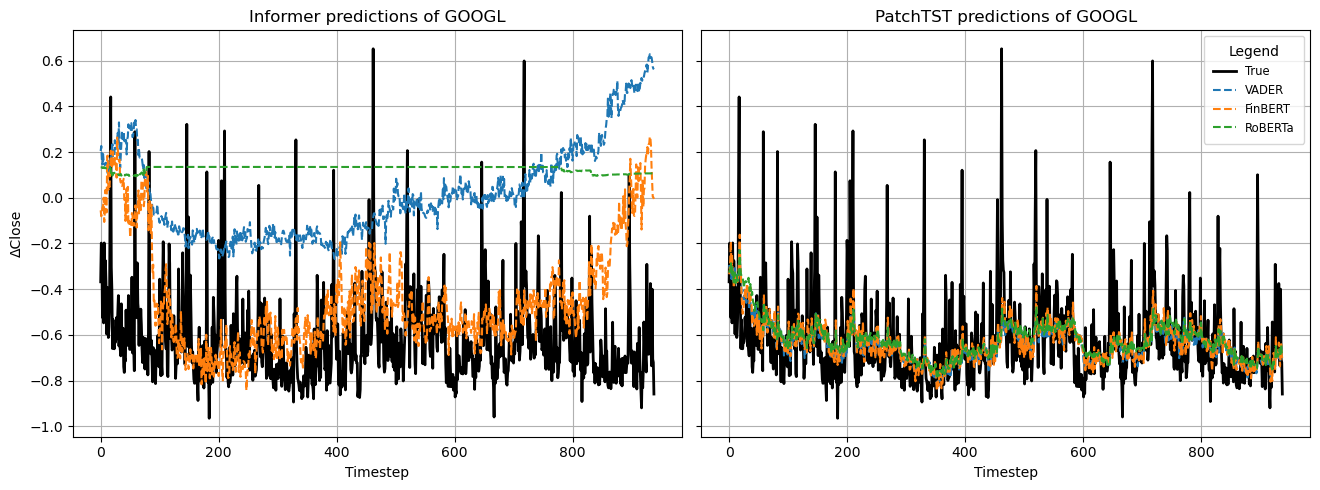

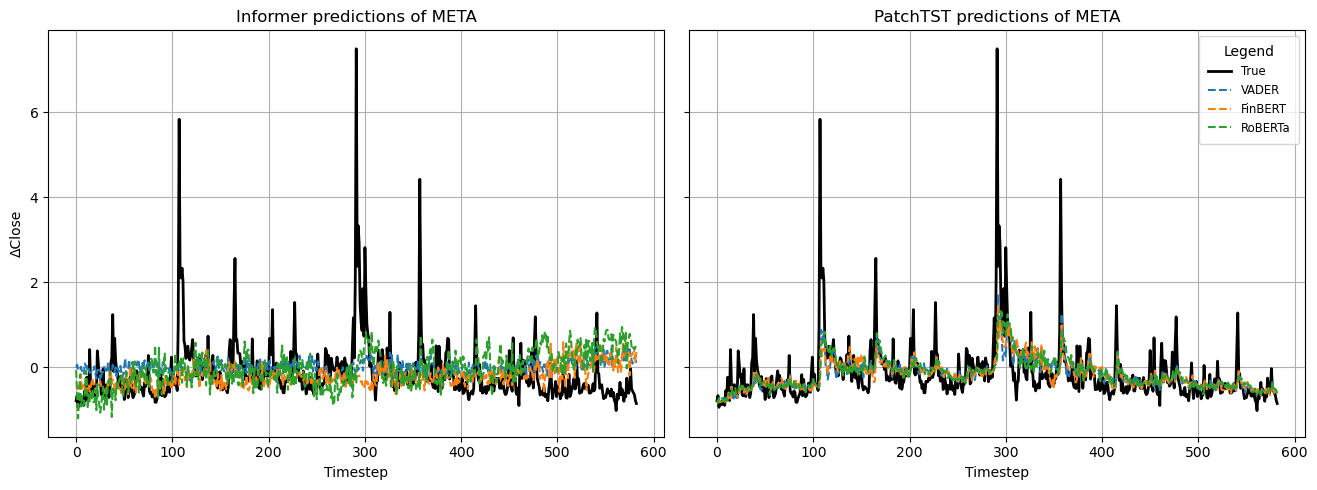

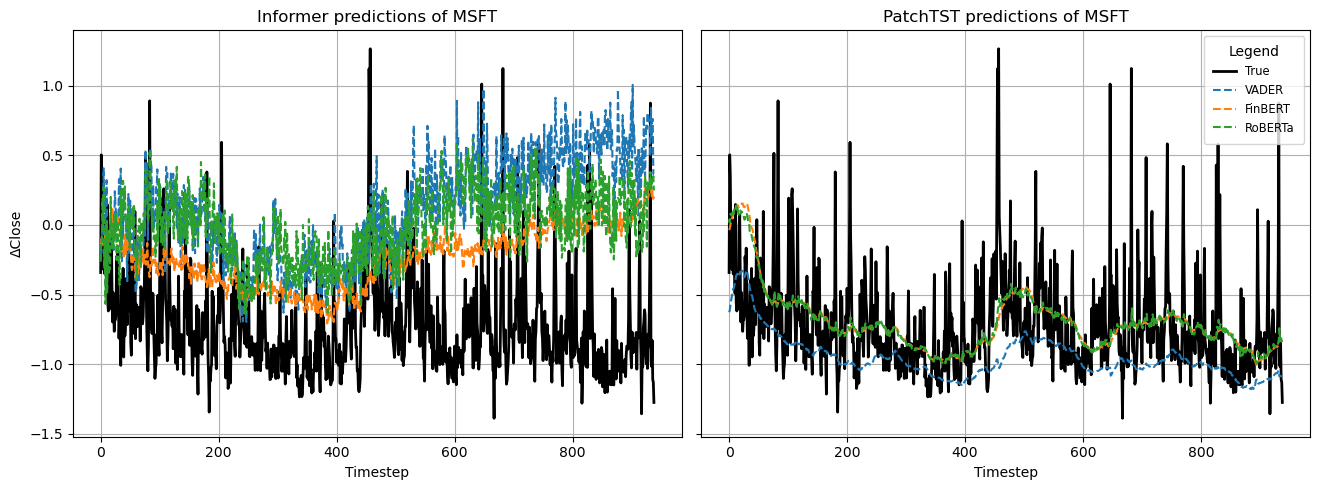

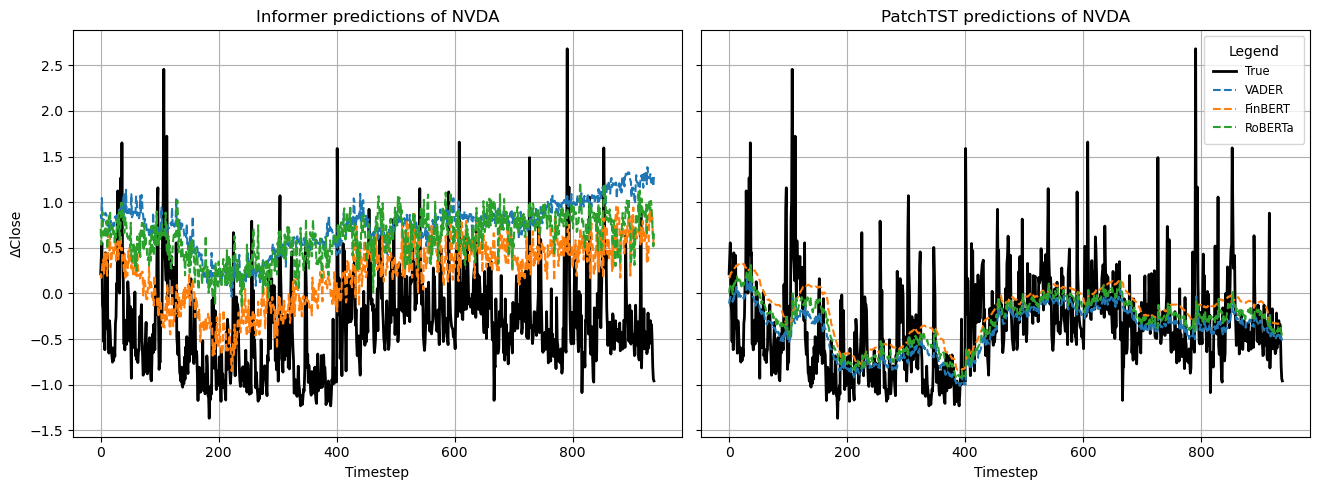

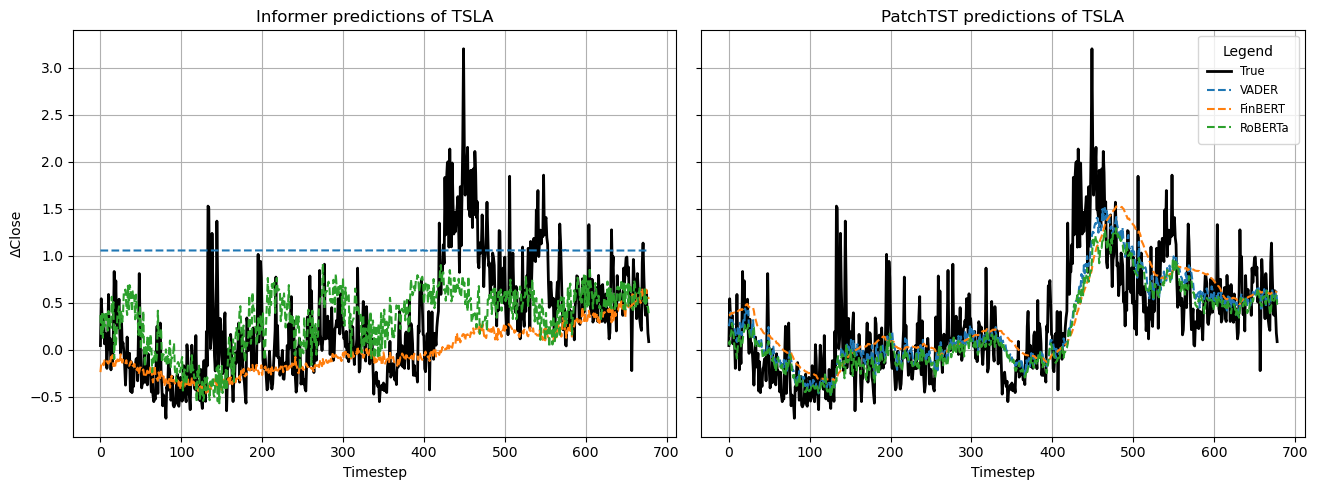

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Configuration
base_path = "/Users/williamnordansjo/DABEN/DABN01 - Masters' Thesis/Result Data"
model_folders = {"informer": "informer_results", "patchtst": "patchtst_results"}
sentiment_labels = {"vader": "VADER", "finbert": "FinBERT", "roberta": "RoBERTa"}
model_labels = {"informer": "Informer", "patchtst": "PatchTST"}
stocks = ["AAPL", "AMZN", "GOOGL", "META", "MSFT", "NVDA", "TSLA"]

# Step 1: Collect paths
data_paths = defaultdict(lambda: defaultdict(dict))

for model_key, subfolder in model_folders.items():
    full_dir = os.path.join(base_path, subfolder)
    if not os.path.exists(full_dir):
        continue
    for folder in os.listdir(full_dir):
        if not folder.startswith("long_term_forecast_"):
            continue
        parts = folder.split("_")
        try:
            stock = parts[3].upper()
            sentiment = parts[4].lower()
            model = parts[5].lower()
        except IndexError:
            continue
        full_path = os.path.join(full_dir, folder)
        if os.path.exists(os.path.join(full_path, "true.npy")):
            data_paths[stock][model][sentiment] = full_path

# Step 2: Plot per stock
for stock in stocks:
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    handles = []
    labels = []

    for ax_idx, model in enumerate(["informer", "patchtst"]):
        ax = axs[ax_idx]
        true_series_plotted = False

        for sentiment in sentiment_labels.keys():
            folder = data_paths.get(stock, {}).get(model, {}).get(sentiment)
            if not folder:
                continue
            try:
                true = np.load(os.path.join(folder, "true.npy"))
                pred = np.load(os.path.join(folder, "pred.npy"))
                true_series = true[:, 0, 0]
                pred_series = pred[:, 0, 0]

                if not true_series_plotted:
                    h_true, = ax.plot(true_series, label="True", linewidth=2, color="black")
                    true_series_plotted = True
                    if "True" not in labels:
                        handles.append(h_true)
                        labels.append("True")

                label = sentiment_labels[sentiment]
                h_pred, = ax.plot(pred_series, label=label, linestyle="--")
                if label not in labels:
                    handles.append(h_pred)
                    labels.append(label)

            except Exception as e:
                print(f"Error loading {stock}-{sentiment}-{model}: {e}")
                continue

        ax.set_title(f"{model_labels[model]} predictions of {stock}")
        ax.set_xlabel("Timestep")
        if ax_idx == 0:
            ax.set_ylabel("ΔClose")
        ax.grid(True)

    # Place legend in upper right of second subplot
    axs[1].legend(
        handles,
        labels,
        title="Legend",
        loc='upper right',
        fontsize="small",
        frameon=True,
        borderpad=0.8,
    )

    plt.tight_layout(rect=[0, 0, 0.95, 1])  # leave space for legend
    plt.show()
    # To save:
    plt.savefig(f"{stock}_predictions_by_model.png", dpi=300, bbox_inches='tight')
    plt.close()


## Regression Metrics Again

In [14]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Configuration
base_path = "/Users/williamnordansjo/DABEN/DABN01 - Masters' Thesis/Result Data"
model_folders = {"informer": "informer_results", "PatchTST": "patchtst_results"}
sentiment_models = ["vader", "finbert", "roberta"]
stocks = ["AAPL", "AMZN", "GOOGL", "META", "MSFT", "NVDA", "TSLA"]

# Storage
results = []

# Loop through all combinations
for model in model_folders:
    model_dir = os.path.join(base_path, model_folders[model])
    
    for stock in stocks:
        for sentiment in sentiment_models:
            match_prefix = f"long_term_forecast_{stock.lower()}_{sentiment}_{model}_best"
            
            # Try to find matching subfolder
            try:
                folder_candidates = [f for f in os.listdir(model_dir) if f.startswith(match_prefix)]
                if not folder_candidates:
                    print(f"Missing folder for {model}-{stock}-{sentiment}")
                    continue
                
                folder = os.path.join(model_dir, folder_candidates[0])
                true = np.load(os.path.join(folder, "true.npy"))
                pred = np.load(os.path.join(folder, "pred.npy"))
                
                true_series = true[:, 0, 0]
                pred_series = pred[:, 0, 0]
                
                # Compute metrics
                mae = mean_absolute_error(true_series, pred_series)
                mse = mean_squared_error(true_series, pred_series)
                medae = np.median(np.abs(true_series - pred_series))
                medse = np.median((true_series - pred_series) ** 2)

                results.append({
                    "Prediction Model": model.capitalize(),
                    "Stock": stock,
                    "Sentiment Model": sentiment.capitalize(),
                    "MAE": mae,
                    "MSE": mse,
                    "MedAE": medae,
                    "MedSE": medse
                })

            except Exception as e:
                print(f"Error for {model}-{stock}-{sentiment}: {e}")
                continue

# Create DataFrame
df_results = pd.DataFrame(results)

# Optional: sort and view
df_results #= df_results.sort_values(["Stock", "Prediction Model", "Sentiment Model"])
#df_results.head(42)


,Prediction Model,Stock,Sentiment Model,MAE,MSE,MedAE,MedSE
0,Informer,AAPL,Vader,1.194811,1.505186,1.193279,1.423914
1,Informer,AAPL,Finbert,0.591590,0.385525,0.604439,0.365347
2,Informer,AAPL,Roberta,0.958041,0.942684,0.966016,0.933186
3,Informer,AMZN,Vader,0.935391,0.969693,0.970140,0.941171
4,Informer,AMZN,Finbert,0.450075,0.293552,0.404845,0.163899
5,Informer,AMZN,Roberta,0.852706,0.837072,0.877130,0.769358
6,Informer,GOOGL,Vader,0.647239,0.485102,0.627064,0.393210
7,Informer,GOOGL,Finbert,0.258814,0.118412,0.186660,0.034842
8,Informer,GOOGL,Roberta,0.754074,0.599640,0.792994,0.628839
9,Informer,META,Vader,0.514621,0.576777,0.430335,0.185188


In [15]:
avg_Res_metrics = (
    df_results.groupby(['Prediction Model', 'Sentiment Model'])[['MAE', 'MSE','MedAE','MedSE']]
    .mean()
    .reset_index()
    .sort_values(by=['Prediction Model', 'Sentiment Model'])
)

avg_Res_metrics

,Prediction Model,Sentiment Model,MAE,MSE,MedAE,MedSE
0,Informer,Finbert,0.486619,0.394928,0.421945,0.209299
1,Informer,Roberta,0.759054,0.750146,0.748052,0.618084
2,Informer,Vader,0.877347,0.982816,0.870703,0.823457
3,Patchtst,Finbert,0.240481,0.155709,0.183653,0.044283
4,Patchtst,Roberta,0.222091,0.138893,0.163517,0.032839
5,Patchtst,Vader,0.221270,0.142680,0.154316,0.028414


## Making sure classification is good

In [16]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Configuration
base_path = "/Users/williamnordansjo/DABEN/DABN01 - Masters' Thesis/Result Data"
model_folders = {"informer": "informer_results", "PatchTST": "patchtst_results"}
sentiment_models = ["vader", "finbert", "roberta"]
stocks = ["AAPL", "AMZN", "GOOGL", "META", "MSFT", "NVDA", "TSLA"]

results = []
EPSILON = 1e-5

for model in model_folders:
    model_dir = os.path.join(base_path, model_folders[model])
    
    for stock in stocks:
        for sentiment in sentiment_models:
            prefix = f"long_term_forecast_{stock.lower()}_{sentiment}_{model}_best"
            try:
                folder = [f for f in os.listdir(model_dir) if f.startswith(prefix)][0]
                path = os.path.join(model_dir, folder)

                true = np.load(os.path.join(path, "true.npy"))[:, 0, 0]
                pred = np.load(os.path.join(path, "pred.npy"))[:, 0, 0]
                true_direction = np.sign(np.diff(true))
                pred_direction = np.sign(np.diff(pred))
                

                # Convert to binary movement: 1 = up, 0 = down/stable
                y_true = (true_direction >= -EPSILON).astype(int)
                y_pred = (pred_direction >= -EPSILON).astype(int)
                #y_true = (true >= -EPSILON).astype(int)
                #y_pred = (pred >= -EPSILON).astype(int)

                # Confusion matrix components
                TP = np.sum((y_true == 1) & (y_pred == 1))
                TN = np.sum((y_true == 0) & (y_pred == 0))
                FP = np.sum((y_true == 0) & (y_pred == 1))
                FN = np.sum((y_true == 1) & (y_pred == 0))

                # Metrics
                total = len(y_true)
                mda = (TP + TN) / total
                precision = precision_score(y_true, y_pred, zero_division=0)
                recall = recall_score(y_true, y_pred, zero_division=0)
                f1 = f1_score(y_true, y_pred, zero_division=0)

                results.append({
                    "Prediction Model": model.capitalize(),
                    "Stock": stock,
                    "Sentiment Model": sentiment.capitalize(),
                    "MDA": mda,
                    "TP": TP,
                    "FP": FP,
                    "TN": TN,
                    "FN": FN,
                    "Precision": precision,
                    "Recall": recall,
                    "F1": f1
                })

            except Exception as e:
                print(f"Error processing {model}-{stock}-{sentiment}: {e}")
                continue

# To DataFrame
df_directional = pd.DataFrame(results)
df_directional


,Prediction Model,Stock,Sentiment Model,MDA,TP,FP,TN,FN,Precision,Recall,F1
0,Informer,AAPL,Vader,0.482301,200,245,236,223,0.449438,0.472813,0.460829
1,Informer,AAPL,Finbert,0.514381,222,238,243,201,0.482609,0.524823,0.502831
2,Informer,AAPL,Roberta,0.486726,203,244,237,220,0.454139,0.479905,0.466667
3,Informer,AMZN,Vader,0.501066,216,246,254,222,0.467532,0.493151,0.480000
4,Informer,AMZN,Finbert,0.507463,224,248,252,214,0.474576,0.511416,0.492308
5,Informer,AMZN,Roberta,0.524520,233,241,259,205,0.491561,0.531963,0.510965
6,Informer,GOOGL,Vader,0.488273,206,258,252,222,0.443966,0.481308,0.461883
7,Informer,GOOGL,Finbert,0.488273,210,262,248,218,0.444915,0.490654,0.466667
8,Informer,GOOGL,Roberta,0.480810,210,269,241,218,0.438413,0.490654,0.463065
9,Informer,META,Vader,0.520619,145,151,158,128,0.489865,0.531136,0.509666


In [17]:
avg_res_MDA_metrics = (
    df_directional.groupby(['Prediction Model', 'Sentiment Model'])[['MDA', 'Precision','Recall', 'F1']]
    .mean()
    .reset_index()
    .sort_values(by=['Prediction Model', 'Sentiment Model'])
)

avg_res_MDA_metrics

,Prediction Model,Sentiment Model,MDA,Precision,Recall,F1
0,Informer,Finbert,0.504137,0.470064,0.507693,0.488122
1,Informer,Roberta,0.497318,0.463046,0.498491,0.480063
2,Informer,Vader,0.499833,0.465593,0.501743,0.482890
3,Patchtst,Finbert,0.431742,0.391211,0.401345,0.395985
4,Patchtst,Roberta,0.429639,0.384444,0.376178,0.380140
5,Patchtst,Vader,0.435271,0.391953,0.391442,0.391559


## Diebold-Mariano Again

In [18]:
def newey_west_var(x, lag=None):
    """
    Newey-West estimator for variance of a time series x.
    """
    T = len(x)
    if lag is None:
        lag = int(np.floor(4 * (T / 100)**(2/9)))  # Newey-West lag rule of thumb

    mean_x = np.mean(x)
    residuals = x - mean_x
    gamma0 = np.dot(residuals, residuals) / T
    var = gamma0

    for l in range(1, lag + 1):
        weight = 1 - l / (lag + 1)
        gamma = np.dot(residuals[l:], residuals[:-l]) / T
        var += 2 * weight * gamma

    return var


In [20]:
import numpy as np
import pandas as pd
from scipy import stats

def panel_diebold_mariano(true_dict, pred_dict, model1, model2, loss_func='mse'):
    """
    Run panel-level Diebold-Mariano test based on cross-sectional averaging over series.
    """
    stocks = list(true_dict.keys())
    T_shared = None
    all_dts = []

    for stock in stocks:
        try:
            # Load raw series
            y_true = true_dict[stock]
            y_pred1 = pred_dict[model1][stock]
            y_pred2 = pred_dict[model2][stock]

            # Synchronize to shortest shared length
            min_T = min(len(y_true), len(y_pred1), len(y_pred2))
            y_true = y_true[:min_T]
            y_pred1 = y_pred1[:min_T]
            y_pred2 = y_pred2[:min_T]


            # Check same length
            if len(y_true) != len(y_pred1) or len(y_true) != len(y_pred2):
                continue

            # Loss per time step
            if loss_func == 'mse':
                e1 = (y_true - y_pred1) ** 2
                e2 = (y_true - y_pred2) ** 2
            elif loss_func == 'mae':
                e1 = np.abs(y_true - y_pred1)
                e2 = np.abs(y_true - y_pred2)
            else:
                raise ValueError("Unsupported loss function")

            d = e1 - e2
            all_dts.append(d)

            if T_shared is None:
                T_shared = len(d)
            else:
                T_shared = min(T_shared, len(d))

        except KeyError:
            continue

    if len(all_dts) == 0:
        raise ValueError("No overlapping stocks between models.")

    # Trim all series to shared T
    all_dts_trimmed = [d[:T_shared] for d in all_dts]
    all_dts_array = np.stack(all_dts_trimmed)  # shape: (S, T)

    # Cross-sectional average per time step (vector of length T)
    dt_bar = np.mean(all_dts_array, axis=0)

    # Compute test statistic
    d_bar = np.mean(dt_bar)
    d_var = newey_west_var(dt_bar)
    dm_stat = d_bar / np.sqrt(d_var / T_shared)
    p_value = 2 * (1 - stats.norm.cdf(np.abs(dm_stat)))

    return dm_stat, p_value, len(all_dts)


In [9]:
# --- Define your model pairs (from screenshot) ---
model_pairs = [
    ("informer_finbert", "informer_vader"),
    ("informer_finbert", "informer_roberta"),
    ("informer_finbert", "patchtst_finbert"),
    ("informer_finbert", "patchtst_roberta"),
    ("informer_finbert", "patchtst_vader"),
    ("informer_vader", "informer_roberta"),
    ("informer_vader", "patchtst_finbert"),
    ("informer_vader", "patchtst_roberta"),
    ("informer_vader", "patchtst_vader"),
    ("informer_roberta", "patchtst_finbert"),
    ("informer_roberta", "patchtst_roberta"),
    ("informer_roberta", "patchtst_vader"),
    ("patchtst_finbert", "patchtst_vader"),
    ("patchtst_finbert", "patchtst_roberta"),
    ("patchtst_vader", "patchtst_roberta"),
]

# --- Store results ---
panel_dm_results = []

for m1, m2 in model_pairs:
    try:
        dm_stat, p_val, n_stocks = panel_diebold_mariano(true_dict, pred_dict, m1, m2)
        panel_dm_results.append({
            "Model 1": m1,
            "Model 2": m2,
            "DM Stat": dm_stat,
            "p-value": p_val,
            "N Stocks": n_stocks
        })
    except Exception as e:
        print(f"Skipping {m1} vs {m2} due to error: {e}")

# --- Final DataFrame ---
panel_dm_df = pd.DataFrame(panel_dm_results).sort_values("p-value")
panel_dm_df

Skipping informer_finbert vs informer_vader due to error: name 'true_dict' is not defined
Skipping informer_finbert vs informer_roberta due to error: name 'true_dict' is not defined
Skipping informer_finbert vs patchtst_finbert due to error: name 'true_dict' is not defined
Skipping informer_finbert vs patchtst_roberta due to error: name 'true_dict' is not defined
Skipping informer_finbert vs patchtst_vader due to error: name 'true_dict' is not defined
Skipping informer_vader vs informer_roberta due to error: name 'true_dict' is not defined
Skipping informer_vader vs patchtst_finbert due to error: name 'true_dict' is not defined
Skipping informer_vader vs patchtst_roberta due to error: name 'true_dict' is not defined
Skipping informer_vader vs patchtst_vader due to error: name 'true_dict' is not defined
Skipping informer_roberta vs patchtst_finbert due to error: name 'true_dict' is not defined
Skipping informer_roberta vs patchtst_roberta due to error: name 'true_dict' is not defined
Sk

KeyError: 'p-value'

In [65]:
print(f"{stock}: MSE1={np.mean(e1):.4f}, MSE2={np.mean(e2):.4f}")


TSLA: MSE1=0.1489, MSE2=0.1629


## Combination with previous

In [19]:
panel_losses = {}  # panel_losses[model_name][stock] = per-time-step MSE list

for model_name, stock_preds in pred_dict.items():
    for stock, pred_series in stock_preds.items():
        if stock not in true_dict:
            continue

        true_series = true_dict[stock]

        # Sync length
        min_len = min(len(true_series), len(pred_series))
        true_trimmed = true_series[:min_len]
        pred_trimmed = pred_series[:min_len]

        mse_ts = compute_squared_error(true_trimmed, pred_trimmed)

        panel_losses.setdefault(model_name, {})[stock] = mse_ts


NameError: name 'pred_dict' is not defined

In [10]:
def compute_squared_error(true, pred):
    return (true - pred) ** 2

def diebold_mariano_test(loss1_list, loss2_list, h=1):
    S = len(loss1_list)
    assert S == len(loss2_list), "Loss arrays must be same length"
    T = min(len(loss1_list[0]), len(loss2_list[0]))

    d_matrix = np.array([
    loss2_list[s][:T] - loss1_list[s][:T]
    for s in range(S)
    ])
    d_bar_t = np.mean(d_matrix, axis=0)
    d_bar = np.mean(d_bar_t)
    d_demeaned = d_bar_t - d_bar
    T_eff = len(d_bar_t)

    lag = h
    var_hat = newey_west_var(d_bar_t)

    DM_stat = d_bar / np.sqrt(var_hat / T_eff)
    p_value = 2 * (1 - stats.norm.cdf(np.abs(DM_stat)))
    
    print(f"d̄ = {d_bar:.5f}, var̂ = {var_hat:.8f}, T = {T_eff}")

    return DM_stat, p_value


In [11]:
from itertools import combinations
import pandas as pd

results = []

for model1, model2 in combinations(panel_losses.keys(), 2):
    common_stocks = set(panel_losses[model1].keys()) & set(panel_losses[model2].keys())
    if len(common_stocks) == 0:
        print(f"⚠️ No common stocks for {model1} vs {model2}, skipping.")
        continue

    losses1, losses2 = [], []
    T_min = np.inf

    for stock in common_stocks:
        l1 = panel_losses[model1][stock]
        l2 = panel_losses[model2][stock]
        min_len = min(len(l1), len(l2))
        losses1.append(l1[:min_len])
        losses2.append(l2[:min_len])
        T_min = min(T_min, min_len)

    # Trim all losses to same T
    losses1 = [x[:T_min] for x in losses1]
    losses2 = [x[:T_min] for x in losses2]

    dm_stat, p_value = diebold_mariano_test(losses1, losses2)

    results.append({
        "Model 1": model1,
        "Model 2": model2,
        "DM Statistic": dm_stat,
        "p-value": p_value,
        "N stocks": len(common_stocks),
        "T steps": T_min
    })

dm_df = pd.DataFrame(results).sort_values("p-value")

KeyError: 'p-value'

In [90]:
dm_df

,Model 1,Model 2,DM Statistic,p-value,N stocks,T steps
0,informer_finbert,informer_vader,24.412626,0.000000e+00,7,583
1,informer_finbert,informer_roberta,22.252624,0.000000e+00,7,583
2,informer_finbert,patchtst_vader,-13.863244,0.000000e+00,7,583
3,informer_finbert,patchtst_roberta,-14.700136,0.000000e+00,7,583
4,informer_finbert,patchtst_finbert,-13.241436,0.000000e+00,7,583
5,informer_vader,informer_roberta,-10.018107,0.000000e+00,7,583
6,informer_vader,patchtst_vader,-32.265135,0.000000e+00,7,583
7,informer_vader,patchtst_roberta,-33.946080,0.000000e+00,7,583
8,informer_vader,patchtst_finbert,-33.460840,0.000000e+00,7,583
9,informer_roberta,patchtst_vader,-28.135748,0.000000e+00,7,583


In [32]:
import numpy as np
import pandas as pd
from scipy import stats

# Raw values from your screenshot
raw_entries = [
    ("informer_finbert", "informer_vader", 24.412626),
    ("informer_finbert", "informer_roberta", 22.252624),
    ("informer_finbert", "patchtst_vader", -13.863244),
    ("informer_finbert", "patchtst_roberta", -14.700136),
    ("informer_finbert", "patchtst_finbert", -13.241436),
    ("informer_vader", "informer_roberta", -10.018107),
    ("informer_vader", "patchtst_vader", -32.265135),
    ("informer_vader", "patchtst_roberta", -33.946080),
    ("informer_vader", "patchtst_finbert", -33.460840),
    ("informer_roberta", "patchtst_vader", -28.135748),
    ("informer_roberta", "patchtst_roberta", -29.871755),
    ("informer_roberta", "patchtst_finbert", -29.093730),
    ("patchtst_roberta", "patchtst_finbert", 7.422526),
    ("patchtst_vader", "patchtst_finbert", 4.068764),
    ("patchtst_vader", "patchtst_roberta", -0.729607),
]

# Constant info
n_stocks = 7
t_steps = 583

# Build dataframe with computed p-values
dm_df_1 = pd.DataFrame([
    {
        "Model 1": m1,
        "Model 2": m2,
        "DM Statistic": dm_stat,
        "p-value": 2 * (1 - stats.norm.cdf(abs(dm_stat))),
        "N stocks": n_stocks,
        "T steps": t_steps
    }
    for m1, m2, dm_stat in raw_entries
])


In [33]:
dm_df_1

,Model 1,Model 2,DM Statistic,p-value,N stocks,T steps
0,informer_finbert,informer_vader,24.412626,0.000000e+00,7,583
1,informer_finbert,informer_roberta,22.252624,0.000000e+00,7,583
2,informer_finbert,patchtst_vader,-13.863244,0.000000e+00,7,583
3,informer_finbert,patchtst_roberta,-14.700136,0.000000e+00,7,583
4,informer_finbert,patchtst_finbert,-13.241436,0.000000e+00,7,583
5,informer_vader,informer_roberta,-10.018107,0.000000e+00,7,583
6,informer_vader,patchtst_vader,-32.265135,0.000000e+00,7,583
7,informer_vader,patchtst_roberta,-33.946080,0.000000e+00,7,583
8,informer_vader,patchtst_finbert,-33.460840,0.000000e+00,7,583
9,informer_roberta,patchtst_vader,-28.135748,0.000000e+00,7,583


In [36]:
from statsmodels.stats.multitest import multipletests

# Extract raw p-values
raw_pvals = dm_df_1['p-value'].values

# Apply Bonferroni correction
_, bonf_corrected_pvals, _, _ = multipletests(raw_pvals, alpha=0.05, method='bonferroni')
bonf_reject = bonf_corrected_pvals < 0.05

# Apply Benjamini-Hochberg (FDR control)
bh_reject, bh_pvals, _, _ = multipletests(raw_pvals, alpha=0.05, method='fdr_bh')

# Add to DataFrame
dm_df_1['Bonferroni reject'] = bonf_reject
dm_df_1['Bonferroni pval'] = bonf_corrected_pvals
dm_df_1['BH reject'] = bh_reject
dm_df_1['BH pval'] = bh_pvals



In [37]:
dm_df_1

,Model 1,Model 2,DM Statistic,p-value,N stocks,T steps,Bonferroni reject,Bonferroni pval,BH reject,BH pval
0,informer_finbert,informer_vader,24.412626,0.000000e+00,7,583,True,0.000000e+00,True,0.000000e+00
1,informer_finbert,informer_roberta,22.252624,0.000000e+00,7,583,True,0.000000e+00,True,0.000000e+00
2,informer_finbert,patchtst_vader,-13.863244,0.000000e+00,7,583,True,0.000000e+00,True,0.000000e+00
3,informer_finbert,patchtst_roberta,-14.700136,0.000000e+00,7,583,True,0.000000e+00,True,0.000000e+00
4,informer_finbert,patchtst_finbert,-13.241436,0.000000e+00,7,583,True,0.000000e+00,True,0.000000e+00
5,informer_vader,informer_roberta,-10.018107,0.000000e+00,7,583,True,0.000000e+00,True,0.000000e+00
6,informer_vader,patchtst_vader,-32.265135,0.000000e+00,7,583,True,0.000000e+00,True,0.000000e+00
7,informer_vader,patchtst_roberta,-33.946080,0.000000e+00,7,583,True,0.000000e+00,True,0.000000e+00
8,informer_vader,patchtst_finbert,-33.460840,0.000000e+00,7,583,True,0.000000e+00,True,0.000000e+00
9,informer_roberta,patchtst_vader,-28.135748,0.000000e+00,7,583,True,0.000000e+00,True,0.000000e+00
